In [ ]:
import pandas as pd

df = pd.read_csv('Data/energy_consumption_data.csv')
df = df.dropna()

# One-Hot Encode
df_encoded = pd.get_dummies(df, columns=['building_type', 'day_of_week'], drop_first=True)


df_encoded[['building_type_Industrial','building_type_Residential','day_of_week_Weekend']] = df_encoded[[
               'building_type_Industrial',
               'building_type_Residential',
               'day_of_week_Weekend'
          ]].astype(int)

print(df_encoded.head(5))

   square_footage  number_of_occupants  appliances_used  average_temperature  \
0            7063                   76               10                29.84   
1           44372                   66               45                16.72   
2           19255                   37               17                14.30   
3           13265                   14               41                32.82   
4           13375                   26               18                11.92   

   energy_consumption  building_type_Industrial  building_type_Residential  \
0             2713.95                         0                          1   
1             5744.99                         0                          0   
2             4101.24                         1                          0   
3             3009.14                         0                          1   
4             3279.17                         0                          0   

   day_of_week_Weekend  
0                    0  


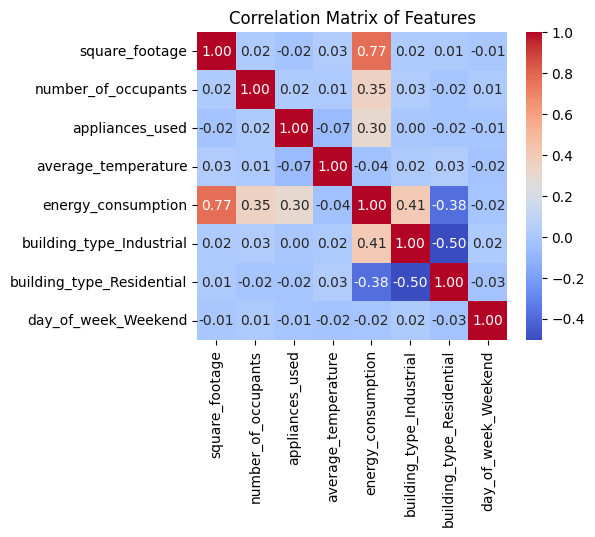

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


features_df = df_encoded
corr_matrix = features_df.corr()
##print(corr_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()



In [21]:
import joblib
X_df_for_cols = df_encoded[['square_footage', 'number_of_occupants', 'appliances_used','building_type_Industrial']]
joblib.dump(X_df_for_cols.columns.tolist(), 'linear_model_features.pkl')
print("\nModel features saved as linear_model_features.pkl")

X =X_df_for_cols.values
y = df_encoded['energy_consumption'].values


Model features saved as linear_model_features.pkl


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (770, 4)
X_test shape: (330, 4)
Y_train shape: (770,)
Y_test shape: (330,)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
##X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

X_test_scaled=scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
y_pred_lr = lr.predict(X_test_scaled)



Scaler saved as scaler.pkl


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Evaluate the model
mae_rf = mean_absolute_error(Y_test, y_pred_lr)
mse_rf = mean_squared_error(Y_test, y_pred_lr)
r2_rf = r2_score(Y_test, y_pred_lr)


print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.4f}")

Mean Absolute Error (MAE): 184.41
Mean Squared Error (MSE): 45793.47
R-squared (R2): 0.9452


In [25]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# Scale the entire dataset X for cross-validation
X_scaled_full = scaler.fit_transform(X) # Re-fit scaler on full X for CV

# Define k-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Using 5 folds

print("\nCross-Validation Results")

cv_scores_lr = cross_val_score(LinearRegression(), X_scaled_full, y, cv=kf, scoring='r2')
print("  Individual R2 scores:", cv_scores_lr)
print(f"  Average R2: {np.mean(cv_scores_lr):.4f}")
print(f"  Standard deviation of R2: {np.std(cv_scores_lr):.4f}")


Cross-Validation Results
  Individual R2 scores: [0.94319653 0.94538271 0.9485134  0.95144225 0.94738094]
  Average R2: 0.9472
  Standard deviation of R2: 0.0028


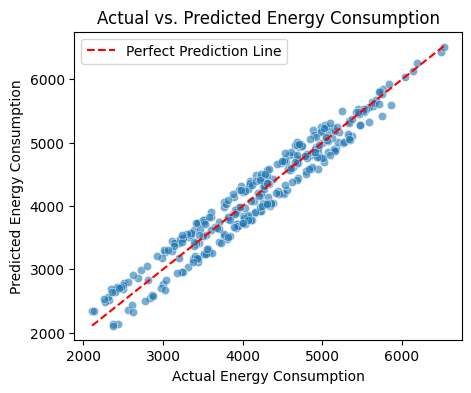

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(5, 4)) 
sns.scatterplot(x=Y_test, y=y_pred_lr, alpha=0.6)
plt.title('Actual vs. Predicted Energy Consumption') 
plt.xlabel('Actual Energy Consumption') 
plt.ylabel('Predicted Energy Consumption') 


min_val = min(np.min(Y_test), np.min(y_pred_lr))
max_val = max(np.max(Y_test), np.max(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend() 

plt.show() 

In [27]:
import joblib

# Save the trained model to a file
# joblib is preferred over pickle for large numpy arrays.
joblib.dump(lr, 'linear_regression_energy_model.pkl')
print("\nModel saved as linear_regression_energy_model.pkl")



Model saved as linear_regression_energy_model.pkl
